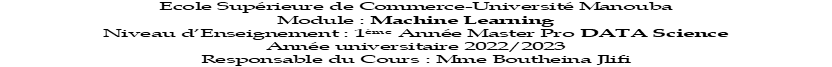

# TP4-Partie2: Régression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('DatasetHousePrice.csv')


## Business understanding + Data understanding 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.shape

(1460, 81)

In [7]:
df.describe(include='number')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


### Analyse univariée 

Anlyser la variable catégorielle cible prix 

In [9]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Minimum est supérieur à zéro 

Histogramme des prix 

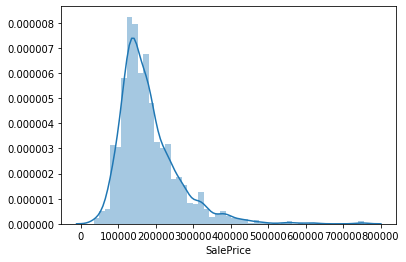

In [10]:
sns.distplot(df['SalePrice']);

### Analyse bi variée 

Analyse bi-variée entre variables numériques

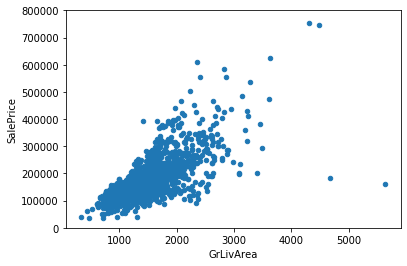

In [13]:
df.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000)); # greater living area (square feet)

Une autre variable : TotalBsmTSF avec SalePrice 

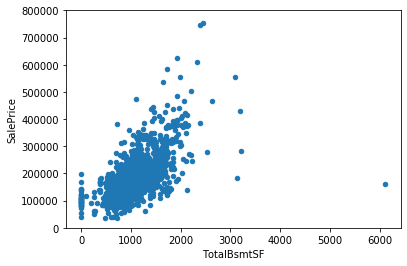

In [14]:

df.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

Strong linear: "Exponential". Tout peut changer !

«GrLivArea» et «TotalBsmtSF» semblent être linéairement liés à «SalePrice».

Les deux relations sont positives, ce qui signifie qu'à mesure qu'une variable augmente, l'autre augmente également. Dans le cas de 'TotalBsmtSF', nous pouvons voir que la pente de la relation linéaire est particulièrement élevée.

Analyse Bi-variée entre catégoriel et numérique

La boîte à moustaches résume quelques indicateurs de position du caractère étudié (médiane, quartiles, minimum, maximum ou déciles). Ce diagramme est utilisé principalement pour comparer un même caractère dans deux populations de tailles différentes.
La boîte à moustaches (aussi appelée diagramme en boîte,plus simplement box plot en anglais) est un moyen rapide de figurer le profil essentiel d'une série statistique quantitative.

In [15]:
df["OverallQual"].value_counts() # “OverallQual” — overall material and finish quality

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

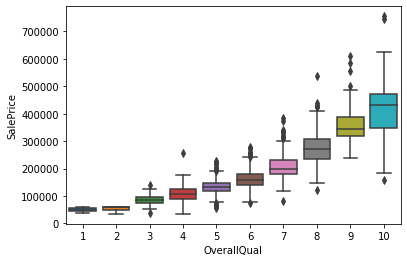

In [16]:

fig = sns.boxplot(x='OverallQual', y="SalePrice", data=df)

La boîte à moustaches montre comment les prix de vente augmentent avec la qualité globale.

Nous avons analysé trois variables. Dans un cas réel, vous pouvez en faire pour d'autres caractéristiques (variables) pour déceler les correlations et choisir les caractéristiques qui vont contribuer à générer un modèle de qualité. 

Matrice de corrélation 

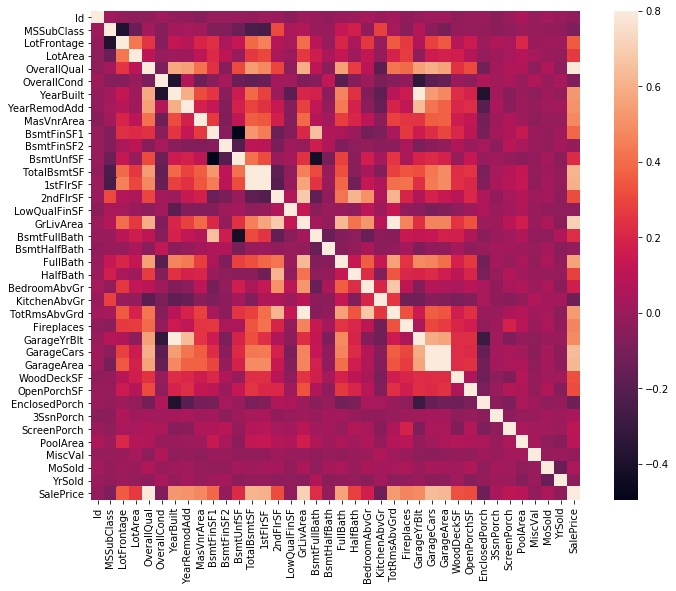

In [17]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Un Zoom sur la matrice de corrélation de SalePrice 

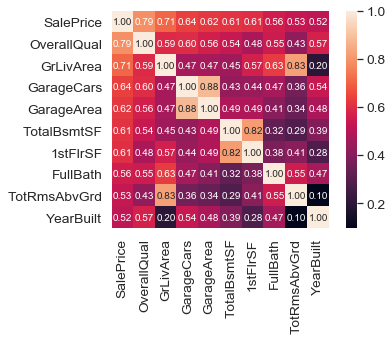

In [18]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

«OverallQual», «GrLivArea» et «TotalBsmtSF» sont fortement corrélés avec «SalePrice». Vérifier!

«GarageCars» et «GarageArea» font également partie des variables les plus fortement corrélées. Cependant, le nombre de voitures qui rentrent dans le garage est une conséquence de la zone du garage. «GarageCars» et «GarageArea» sont comme des frères jumeaux. Vous ne pourrez pas les distinguer. Par conséquent, nous avons juste besoin d'une de ces variables dans notre analyse (nous pouvons garder 'GarageCars' car sa corrélation avec 'SalePrice' est plus élevée).

«TotalBsmtSF» et «1stFloor» semblent également être des frères jumeaux. Nous pouvons garder 'TotalBsmtSF' juste pour dire que notre première estimation était juste.

## Preprocessing 

Les données manquantes : missing data 


In [19]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


-Hypothèse 1 : Nous considérerons que lorsque plus de 15% des données sont manquantes, nous devrions supprimer la variable correspondante et faire comme si elle n'avait jamais existé. Aucune astuce n'est employée pour remplir les données manquantes. 
-Décision1 : PoolQC', 'MiscFeature', 'Alley' sont des variables avec plus de 15% de données manquantes (à supprimer)
- Les variables "Garage.." ont presque le même nombre de données manquantes.

-Hypothèse 2 : Les données manquantes se réfèrent au même ensemble d'observations. Étant donné que les informations les plus importantes concernant les garages sont exprimées par «GarageCars» et étant donné que nous ne parlons que de 5% des données manquantes, supprimer les autres variables "Garage..."
- Nous avons une observation manquante dans «Électrique». Puisqu'il ne s'agit que d'une seule observation, nous allons supprimer cette observation et conserver la variable.

Décision finale qui est valable pour ce dataset seulement : En résumé, pour gérer les données manquantes, nous supprimerons toutes les variables avec des données manquantes, à l'exception de la variable «Électrique». Dans «Électrique», nous allons simplement supprimer l'observation avec des données manquantes.

In [20]:
df = df.drop((missing_data[missing_data['Total'] > 1]).index,1)
df = df.drop(df.loc[df['Electrical'].isnull()].index)
df.isnull().sum().max() 

0

Les outliers : les outliers peuvent affecter le modèle comme elles peuvent être sources d'informations précieuses. 

In [21]:
saleprice_scaled = StandardScaler().fit_transform(df['SalePrice'][:,np.newaxis]);

saleprice_scaled

array([[ 0.34704187],
       [ 0.0071701 ],
       [ 0.53585953],
       ...,
       [ 1.07713679],
       [-0.48847623],
       [-0.42081658]])

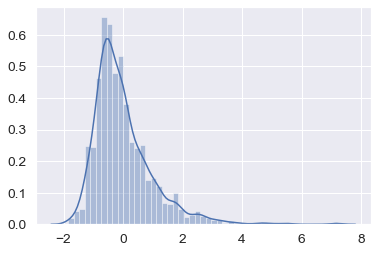

In [22]:
data_df = pd.DataFrame(saleprice_scaled)
sns.distplot(data_df)

Les valeurs de plage basse sont similaires et pas trop éloignées de 0.
Les valeurs élevées de la plage sont loin de 0. La valeur 7 semble être un outlier 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


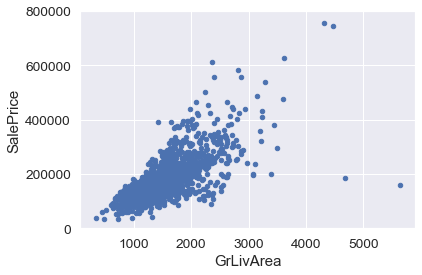

In [23]:
# On l'a fait en analyse bivariée en haut
df.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));


Les deux observations en haut du graphique sont ces 7. observations sur lesquelles nous avons dit qu'il fallait faire attention. Ils ressemblent à deux cas particuliers, mais ils semblent suivre la tendance. Pour cette raison, nous les conserverons.

# Apprentissage 

## Régression linéaire simple avec sklearn 

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
dfX = df[['GrLivArea']]
dfY= df[['SalePrice']]
X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfY, test_size=0.2)
print (X_train)



      GrLivArea
326        1719
1317       1352
91         1235
422         988
517        2344
...         ...
1046       2868
190        2727
877        2224
1167       1671
1300       1983

[1167 rows x 1 columns]


In [36]:
from sklearn import linear_model
#Il faut passer à un tableau numpy
tab_X_train = X_train.to_numpy ()
tab_Y_train = Y_train.to_numpy ()
print(tab_X_train)
regr = linear_model.LinearRegression()
regr.fit(tab_X_train,tab_Y_train)
# Les coefficients
print ('Les Coefficients:')
print ('Le gradient 𝜃1', regr.coef_)
print ('Intercept: 𝜃0',regr.intercept_)

[[1719]
 [1352]
 [1235]
 ...
 [2224]
 [1671]
 [1983]]
Les Coefficients:
Le gradient 𝜃1 [[102.11785824]]
Intercept: 𝜃0 [23587.11239351]


Compléter l'equation du modèle linéarie f(x) = 𝜃0 + 𝜃1 x

In [37]:
a0 = regr.intercept_
a1 = regr.coef_
fx = a0 + np.dot(tab_X_train,a1)

fx.shape

(1167, 1)

Text(0, 0.5, 'Salesprice')

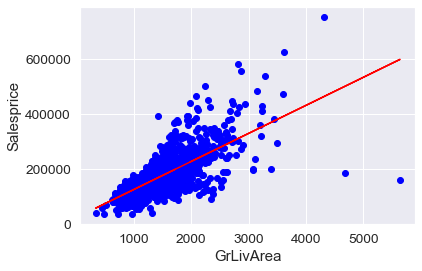

In [38]:
plt.scatter(tab_X_train, tab_Y_train, color='blue')
plt.plot(tab_X_train, regr.coef_[0][0]*X_train+regr.intercept_[0], 'red')
# ou bien 
#plt.plot(X_train, fx, 'red')
plt.xlabel("GrLivArea")
plt.ylabel("Salesprice")

In [39]:
tab_X_test = X_test.to_numpy ()
tab_Y_test = Y_test.to_numpy ()
test_Y_hat = regr.predict(tab_X_test)
print(test_Y_hat)
print (tab_Y_test)


[[177376.606906  ]
 [213832.68229841]
 [174517.30687523]
 [124683.79205312]
 [129687.56710698]
 [225065.64670503]
 [205969.60721377]
 [193204.87493352]
 [126215.55992675]
 [200659.47858519]
 [122437.19917179]
 [192183.6963511 ]
 [114676.2419454 ]
 [206582.31436323]
 [111204.23476517]
 [267853.02930844]
 [116718.59911024]
 [ 97111.97032777]
 [175130.01402468]
 [224555.05741382]
 [121416.02058937]
 [135916.75645974]
 [193102.75707528]
 [200557.36072695]
 [164816.11034223]
 [170636.82826203]
 [155931.85667518]
 [146128.54228394]
 [122130.84559707]
 [179214.72835436]
 [306964.16901514]
 [172270.7139939 ]
 [161956.81031146]
 [183605.79625877]
 [134487.10644435]
 [ 85368.41662993]
 [121007.5491564 ]
 [198821.35713683]
 [105587.75256186]
 [211892.44299181]
 [273980.10080297]
 [182482.49981811]
 [137754.8779081 ]
 [268874.20789086]
 [221287.28595008]
 [141022.64937184]
 [288685.07238982]
 [214343.27158962]
 [211381.8537006 ]
 [212505.15014126]
 [225984.70742921]
 [480666.64588484]
 [117841.895

In [40]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Mean Absolute Error(MAE) avec calcul: %.2f" % np.mean(np.absolute(test_Y_hat - tab_Y_test)))
print("Mean Squared Error(MSE) avec calcul :", ((np.mean((test_Y_hat - tab_Y_test) ** 2))))
print("Root Mean Squared Error(RMSE) avec calcul :", ((np.mean((test_Y_hat - tab_Y_test) ** 2))**0.5))
# C'est la Somme des carrés des résidus (RSS) si on ne fait pas la moyenne
b1=mean_squared_error(tab_Y_test, test_Y_hat)
print("MSE avec fonction est:",b1)
# On aura RMSE si on met squared=False ça sera Root Squared Error (RMSE)
b2=mean_squared_error(tab_Y_test, test_Y_hat, squared= False)
print("RMSE avec fonction est:",b2)
print("R2-score:", r2_score(test_Y_hat , tab_Y_test) )

Mean Absolute Error(MAE) avec calcul: 39409.93
Mean Squared Error(MSE) avec calcul : 3754916590.633271
Root Mean Squared Error(RMSE) avec calcul : 61277.37421457672
MSE avec fonction est: 3754916590.633271
RMSE avec fonction est: 61277.37421457672
R2-score: -0.42278552800433156


## Activité1 

## Régression linéaire multiple 

In [41]:
dfX = df[['GrLivArea','TotalBsmtSF']]
dfY= df[['SalePrice']]
Xm_train, Xm_test, Ym_train, Ym_test = train_test_split(dfX, dfY, test_size=0.2)
tab_Xm_train = Xm_train.to_numpy ()
tab_Ym_train = Ym_train.to_numpy ()
tab_Xm_test = Xm_test.to_numpy ()
tab_Ym_test = Ym_test.to_numpy ()
regM= LinearRegression()
predM = regM.fit(tab_Xm_train,tab_Ym_train)
YM = regM.predict(tab_Xm_test)


In [42]:
print (predM.intercept_)
predM.coef_

[-10356.76531753]


array([[80.27858574, 65.75119   ]])

## Activité2 

In [43]:
x1=df['GrLivArea'].to_numpy()
x2=df['TotalBsmtSF'].to_numpy()


Calculer YM en fonction de pred.intercept_ et pred.coef_ 

In [44]:
w0 = predM.intercept_
w1 = predM.coef_[0][0]
w2 = predM.coef_[0][1]


In [45]:
# YM = ?? terminez la fonction
YM

array([[163563.68650121],
       [159859.20058599],
       [204898.00991678],
       [ 93684.2818075 ],
       [259331.93150708],
       [244851.80361424],
       [122556.3621272 ],
       [191179.10287646],
       [171012.21615561],
       [111286.03787661],
       [252496.83102035],
       [209755.70109646],
       [185031.07462696],
       [199202.25969287],
       [238576.46919706],
       [209675.50593489],
       [185173.65900801],
       [148231.57113966],
       [190230.12039491],
       [182135.24926643],
       [232052.66241629],
       [104130.57886519],
       [142314.71985806],
       [165454.68725206],
       [224246.57729362],
       [155995.8359842 ],
       [162357.82923012],
       [195485.43041257],
       [156658.80546053],
       [154395.72184565],
       [180605.84334914],
       [163542.10646837],
       [126091.81002146],
       [125192.03415185],
       [235669.39498712],
       [101447.79583442],
       [108005.44758959],
       [171742.36503432],
       [1924

In [46]:
Ypredit= regM.predict(df[['GrLivArea','TotalBsmtSF']])
Ypredit

array([[183202.63494461],
       [173932.81167047],
       [193511.88362112],
       ...,
       [253240.49620332],
       [147063.33293371],
       [173056.63301601]])

## Activité3 